<img src="bitcoin-stock-portfolio.jpg" width="900px" align="center">

## 💾 The data we have
You have access to three files:

#### Bitcoin daily data in US dollars
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the price at the beginning of the trading day
- "high" - the highest price reached that day
- "low" - the lowest price reached that day
- "close" - the price at the closing of the trading day
- "volume" - how many Bitcoin were traded that day

#### S&P 500 daily data
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the index level at the beginning of the trading day
- "high" - the highest level reached that day
- "low" - the lowest level reached that day
- "close" - the level at the closing of the trading day
- "volume" - how many shares in the companies that make up the index were traded that day

#### inflation and gold as monthly data
- "date" - date from September, 2014 to November, 2021
- "gold_usd" - price in usd of gold for that month
- "cpi_us" - the inflation index for the US for that month (cpi = consumer price index)

_CPI data from the [U.S. Bureau of Labor Statistics](https://www.bls.gov/cpi/). Publicly available information_.

In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {border: 1px  LightSteelBlue solid !important;
  color: DarkBlue
 !important;}


<div style="resize: vertical; height: 300px; overflow: scroll; width: 300px;">
<div style="height: 90%; overflow: auto;">
<div id="table"></div>
</div>
<div style="height: 10px;"></div>
</div>


<div class="alert alert-block alert-success">
<b>Note:</b> Run the previous cell  to make the dataframes in this page more readable and formated .
</div>

In [2]:
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
import mplfinance as mf

import ipywidgets as wg
import cufflinks as cf
cf.set_config_file(theme='pearl',sharing='public',offline=True)
%matplotlib inline
bitcoin = pd.read_csv('./data/bitcoin-usd.csv', parse_dates=['date'])
bitcoin.head()

,date,open,high,low,close,volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0


In [3]:
bitcoin.info()
#after running this cell i found that there are extra data in date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2619 non-null   datetime64[ns]
 1   open    2615 non-null   float64       
 2   high    2615 non-null   float64       
 3   low     2615 non-null   float64       
 4   close   2615 non-null   float64       
 5   volume  2615 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 122.9 KB


In [4]:
#I will show the null rows here and get rid of them.
print(bitcoin[bitcoin['open'].isna()==True])

bitcoin.dropna( inplace=True)

print('-'*40)

bitcoin.info()

           date  open  high  low  close  volume
2039 2020-04-17   NaN   NaN  NaN    NaN     NaN
2214 2020-10-09   NaN   NaN  NaN    NaN     NaN
2217 2020-10-12   NaN   NaN  NaN    NaN     NaN
2218 2020-10-13   NaN   NaN  NaN    NaN     NaN
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2615 entries, 0 to 2618
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2615 non-null   datetime64[ns]
 1   open    2615 non-null   float64       
 2   high    2615 non-null   float64       
 3   low     2615 non-null   float64       
 4   close   2615 non-null   float64       
 5   volume  2615 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 143.0 KB


# 🙧 🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨 🙤







# 

<a id='Cleaning'></a>
<table style="width:100%" align="left">
  <tr>
    <th>
<img src="https://institute.careerguide.com/wp-content/uploads/2020/10/7a2fc27b966a50792117d375a24bb71e.gif" width="500px" align="left"> </th>
<th> <h1>Exploratory section.</h1></th>


In [5]:
#let's explore the support&resistance lines

fig = go.Figure( data=[go.Candlestick(x=bitcoin['date'],
                open=bitcoin['open'],
                high=bitcoin['high'],
                low=bitcoin['low'],
                close=bitcoin['close'])])
fig.add_hline(y=59520,line_width=2, line_dash="dash", line_color="red")
fig.add_hline(y=51000,line_width=2, line_dash="dash", line_color="green")
fig.add_hline(y=42000,line_width=2, line_dash="dash", line_color="blue")



fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()


# 🙞 🗦 So we approaching a supporting line 🗧 !
## 🙞 🗦 Thats endorse the investing hypothesis.  🗧 

In [6]:
# let's explore some patterns in the graph to endorse the investment hypothesis
bitcoin_scope=bitcoin[bitcoin['date']>='2021-1-1']

fig = go.Figure( data=[go.Candlestick(x=bitcoin_scope['date'],
                open=bitcoin_scope['open'],
                high=bitcoin_scope['high'],
                low=bitcoin_scope['low'],
                close=bitcoin_scope['close'])])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.add_vrect(x0='2021-9-29', x1='2021-10-23',annotation_text="Pattern", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0='2021-2-7', x1='2021-2-28',annotation_text="Pattern", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)

fig.add_vrect(x0='2021-7-21', x1='2021-8-5',annotation_text="Pattern", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0='2021-11-6', x1='2021-11-16',annotation_text="Pattern", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
fig.show()

# 🙞 🗦 So we have the same pattern before the price is rising 🗧 !
## 🙞 🗦 Thats endorse the investing hypothesis.  🗧

In [7]:
# let's see the last 3 candles to see thier types

bitcoin_scope=bitcoin[bitcoin['date']>='2021-11-1']

fig = go.Figure( data=[go.Candlestick(x=bitcoin_scope['date'],
                open=bitcoin_scope['open'],
                high=bitcoin_scope['high'],
                low=bitcoin_scope['low'],
                close=bitcoin_scope['close'])])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.add_vrect(x0='2021-11-16', x1='2021-11-18',line=dict(
            color='green',
        ))
fig.add_shape(
        type='line',
        x0='2021-11-8',
        y0='67673',
        x1='2021-11-17',
        y1='59000',
        line=dict(
            color='Red',
        ),line_dash="dash")

fig.show()



<img src="https://www.nothardtrading.com/wp-content/uploads/2020/12/Inverted-Hammer-Candle-Pattern-GREEN.png" width="500px" align="center">

# 🙞 🗦 So we have an inverted hmmer pattern  comming after down trend 🗧 !

## 🙞 🗦 Thats endorse the investing hypothesis.  🗧 !

In [8]:
# let's use the bollinger and rsi to detect the signs of buying

bitcoin_scope=bitcoin[bitcoin['date']>='2021-9-1']
bitcoin_scope=bitcoin_scope.set_index('date')

qf=cf.QuantFig(bitcoin_scope,title='Bitcoin Bollinger Figure',legend='top',name='GS')

qf.add_bollinger_bands(periods=20,boll_std=2,colors=['green','red'],fill=True)
qf.add_sma([10,20],width=2,color=['green','lightgreen'],legendgroup=True)
qf.add_rsi(periods=20,color='java')

qf.iplot()

# 🙞 🗦 So we have an uncertain period but seems to be buying sign as the bollinger get narrow  and rsi moving towards buying🗧 !
## 🙞 🗦 Thats endorse the investing hypothesis.  🗧

In [9]:
sp500 = pd.read_csv('./data/sp500.csv', parse_dates=['date'],index_col='date')
sp500.head()



,open,high,low,close,volume
date,,,,,
2014-09-17,1999.300049,2010.739990,1993.290039,2001.569946,3209420000
2014-09-18,2003.069946,2012.339966,2003.069946,2011.359985,3235340000
2014-09-19,2012.739990,2019.260010,2006.589966,2010.400024,4880220000
2014-09-22,2009.079956,2009.079956,1991.010010,1994.290039,3349670000
2014-09-23,1992.780029,1995.410034,1982.770020,1982.770020,3279350000


In [10]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1805 entries, 2014-09-17 to 2021-11-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1805 non-null   float64
 1   high    1805 non-null   float64
 2   low     1805 non-null   float64
 3   close   1805 non-null   float64
 4   volume  1805 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 84.6 KB


In [11]:
# let's use the bollinger and rsi to detect the signs of buying in an inter active way 
temp_df=pd.DataFrame()
def show_data(row=0):
    temp_df=sp500.iloc[row:row+50]
    figg=qf=cf.QuantFig(temp_df,title='Bitcoin Bollinger Figure',legend='top',name='GS')

    qf.add_bollinger_bands(periods=20,boll_std=2,colors=['green','red'],fill=True)
    qf.add_sma([10,20],width=2,color=['green','lightgreen'],legendgroup=True)
    qf.add_rsi(periods=20,color='java')

    
    
    
    return qf.iplot()
wg.interact(show_data,row=(0,1785,1));





interactive(children=(IntSlider(value=0, description='row', max=1785), Output()), _dom_classes=('widget-intera…

# 🙞 🗦 So we have an uncertain period but seems to be buying sign as the bollinger get narrow  and rsi moving  slowly towards buying🗧 !
## 🙞 🗦 Thats endorse the investing hypothesis.  🗧

In [12]:
# let's explore the sp500 data with volume in an interactive way :)
temp_df=pd.DataFrame()
def show_data(row=0):
    temp_df=sp500.iloc[row:row+50]
    figg=mf.plot(temp_df, 
        type = 'candle',
        style =  'charles',
        title = 'sp500 candelstick',
        ylabel = ' Prices',
        figratio=(12,8),
       volume = True,
       show_nontrading = True,
       ylabel_lower='Volume of \n traded' )
    
    
    return figg
wg.interact(show_data,row=(0,1805,50));

interactive(children=(IntSlider(value=0, description='row', max=1805, step=50), Output()), _dom_classes=('widg…

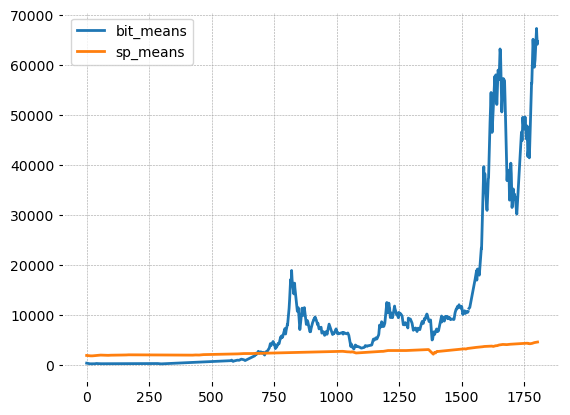

In [13]:
#let's explore the graph of means for each stock
bitcoin['bit_means']=(bitcoin.open+bitcoin.high+bitcoin.low+bitcoin.close)/4

sp500['sp_means']=(sp500.open+sp500.high+sp500.low+sp500.close)/4
sp500=sp500.reset_index()

bit=bitcoin[['date','bit_means']]
sp=sp500[['date','sp_means']]
diff=sp.merge(bit, how='left')
diff[['bit_means','sp_means']].plot();

# 🙞 🗦 So it looks like both of stocks are growing but we will choose bit coin if we want to gain more money in short time because of its variance and if we will invest for long term we better choose sp500 because of its stability 🗧 !


In [22]:
monthly_data = pd.read_csv('./data/monthly_data.csv', parse_dates=['date'])
monthly_data.head()



,date,gold_usd,cpi_us
0,2014-09-01,1241.330,237.852
1,2014-10-01,1223.565,238.031
2,2014-11-01,1176.413,237.433
3,2014-12-01,1200.440,236.151
4,2015-01-01,1249.333,234.812


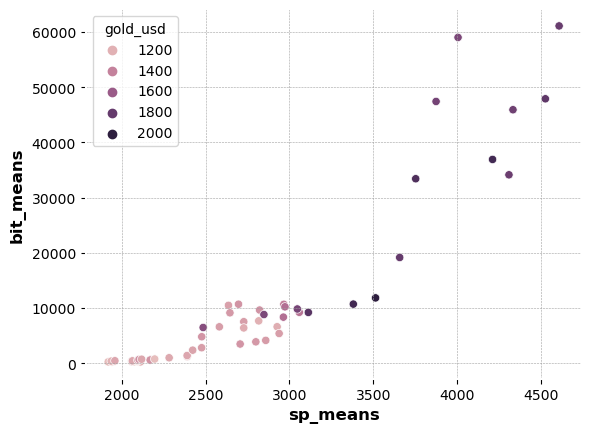

In [26]:
#let's see the relationship betwen the 3 investing stocks
diff=monthly_data.merge(diff, how='left')
diff.dropna(inplace=True)
sb.scatterplot(x=diff.sp_means,y=diff.bit_means,hue=diff.gold_usd);

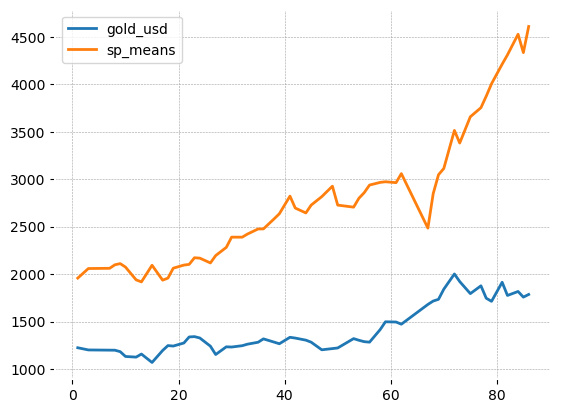

In [31]:
#let's see the stability of gold_usd and sp500 
diff[['gold_usd','sp_means']].plot();

<a id='Cleaning'></a>
<table style="width:100%" align="left">
  <tr>
    <th>
<img src="https://www.sendiancreations.com/ar/wp-content/uploads/2019/05/opening.gif" width="500px" align="left"> </th>
<th> <h1>Conclusions section.</h1></th>


      
   

<div class="alert alert-danger">
  <strong>Note!</strong>  First we must consider the time we gathered this data on and its representation of the population of data we can collect.
</div>

### Question we have :
1. How does the performance of Bitcoin compare to the S&P 500 and the price of gold?
2. Analyze Bitcoin's returns and volatility profile. Do you believe it could help improve the performance of a portfolio? Do you believe Bitcoin could be used as a hedge versus inflation?
3. The CFO is looking to lower volatility in the fund. Explore building a portfolio using some or all of these assets. Make a recommendation that minimizes overall risk.

# Conclusions >> We can say in some confidence level that :
1. Bitcoin is a high return investing field but it is so risky because of its stability is very low, sp500 is more stability and gold is better throw the  small amount of data we have about it.

2. Its high gains make bitcoin a good choice to improve the performance of a portfolio if the CFO acepts taking the risk.


3. I think sp500 will be a good choice because its stability and it is growing with samelar patterns
 


# 🙧 🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨🙨 🙤







# 

<img src="https://th.bing.com/th/id/OIP.nGj6TdFdVpR89OM-fri1lAHaCd?pid=ImgDet&rs=1" alt="Wrangling" width="500px" align="center">